In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('/content/4501_AMANHI_With_USG.xlsx')
#data

In [ ]:
data = data[['PW_AGE','PW_EDUCATION','PREV_MIS','WEALTH_INDEX','PREV_SB','PREV_PTB','PREV_CS','MAT_WEIGHT','SBP1','DBP1','GRAVIDITY','PARITY','TYPEDELIV','BIRTH_OUTCOME','GAGEBRTH','SBP2','DBP2','SBP3','DBP3']]
#print(data)

In [ ]:
data['BIRTH_OUTCOME'].value_counts()

,count
BIRTH_OUTCOME,
1,4280
2,106
-88,90
-77,25


In [ ]:
columns = ['GAGEBRTH', 'BIRTH_OUTCOME', 'PREV_MIS','PREV_PTB' ,'PREV_SB', 'PREV_CS','GRAVIDITY', 'PARITY']
# Replace -88 and -77 with NaN
data.loc[:, columns] = data.loc[:, columns].replace([-88, -77], pd.NA, inplace = False)

# **FILLING THE DATA**

In [ ]:
#data.isnull().sum()

In [ ]:
numer_data = data.select_dtypes(include=['number'])
cate_data = data.select_dtypes(exclude=['number'])

In [ ]:
numer_data = numer_data.fillna(numer_data.mean()) # numerical data by mean
cate_data = cate_data.fillna(cate_data.mode().iloc[0]) # categoric data by mode

In [ ]:
new_data = pd.concat([numer_data,cate_data], axis=1)
#print(new_data)

In [ ]:
new_data.describe()

,ORIG_ID,PW_AGE,PW_EDUCATION,PREV_SB,PREV_MIS,PREV_PTB,PREV_MULTIP,PREV_CS,SINGLE_TWIN,GRAVIDITY,...,SBP4,DBP4,UDIP_PROT4,GAGEBRTH,age_death_b1,age_death_b2,age_death_b3,APH,MAT_WEIGHT,DEL_DATE
count,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,...,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,0.0,4501.000000,4501.000000,4501
mean,27780.755610,27.996001,7.376589,-15.541435,-15.365030,-18.932459,-15.594979,-15.595201,-1.192402,4.333037,...,119.436378,75.543326,-2.308353,272.433349,5.344828,10.916667,NaN,0.038740,59.798537,2016-09-03 22:09:18.275938560
min,16580.000000,18.000000,0.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000,-77.000000,...,89.000000,58.000000,-77.000000,60.000000,0.000000,0.000000,NaN,0.000000,35.000000,2014-08-07 00:00:00
25%,25134.000000,23.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,112.000000,69.000000,0.000000,271.000000,5.344828,10.916667,NaN,0.000000,50.600000,2015-08-19 00:00:00
50%,28008.000000,27.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,...,119.436378,75.543326,0.000000,277.000000,5.344828,10.916667,NaN,0.000000,58.400000,2016-09-13 00:00:00
75%,31157.000000,32.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,...,125.000000,79.000000,0.000000,283.000000,5.344828,10.916667,NaN,0.000000,65.900000,2017-07-31 00:00:00
max,34290.000000,49.000000,15.000000,1.000000,7.000000,1.000000,1.000000,1.000000,3.000000,16.000000,...,235.000000,161.000000,2.000000,328.000000,36.000000,39.000000,NaN,1.000000,125.000000,2018-09-29 00:00:00
std,4335.755014,6.259356,3.466889,33.622445,33.709515,35.642800,33.596841,33.596734,13.690641,5.667368,...,12.798743,9.338065,12.343758,25.069699,1.395999,0.729218,NaN,0.191123,13.113629,NaN


In [ ]:
new_data['GAGEBRTH'] = new_data['GAGEBRTH'] // 7

Spontaneous Abortion output

In [ ]:
# Not Live birth
filtered_rows = new_data[new_data['BIRTH_OUTCOME'] == 2]

In [ ]:
spa_outcome = new_data[new_data['GAGEBRTH'] <= 20]
#spa_outcome

Stillbirth Output

In [ ]:
filtered_rows = new_data[new_data['BIRTH_OUTCOME'] == 2]
stillbirth_outcome = filtered_rows[filtered_rows['GAGEBRTH'] <= 37]
#stillbirth_outcome

Preterm Birth Output

In [ ]:
new_filtered_rows = new_data[new_data['BIRTH_OUTCOME'] == 1]
preterm_outcome = new_filtered_rows[new_filtered_rows['GAGEBRTH'] <= 37].copy()
#preterm_outcome

Correlation Vissualization of the features

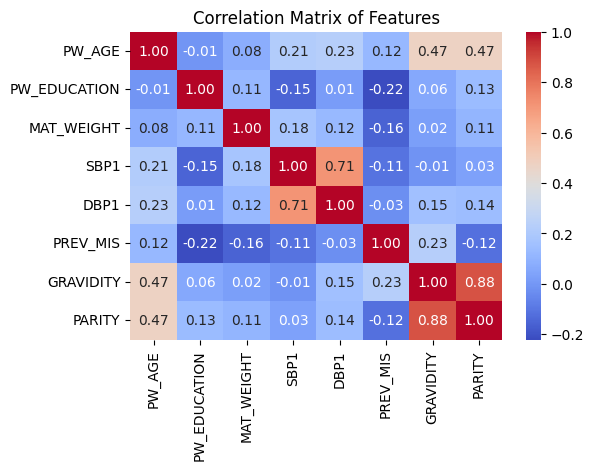

In [ ]:
# Calculate the correlation coefficient matrix
dat3 = spa_outcome[['PW_AGE','PW_EDUCATION','MAT_WEIGHT','SBP1','DBP1','PREV_MIS','GRAVIDITY','PARITY']]
correlation_matrix = dat3.corr()
# Visualization of the correlation matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.savefig('CorrelationMatrix_Pretermbirth.png', dpi=300, bbox_inches='tight')
plt.show()

Statistical Analysis

In [ ]:
age_bins = [0, 20, 25, 30, 35, float('inf')]
age_cat = ['Under 20', '21-25', '26-30', '31-35', 'Over 35']
# Create age category column
spa_outcome.loc[:, 'PW_AGE_Category'] = pd.cut(spa_outcome['PW_AGE'],
    bins=age_bins, labels=age_cat, right=False)
# Count frequency for each category
age_group_count = spa_outcome['PW_AGE_Category'].value_counts().reindex(age_cat).reset_index()
age_group_count.columns = ['PW_AGE_Category', 'Total_Frequency']
age_group_count

,PW_AGE_Category,Total_Frequency
0,Under 20,3
1,21-25,8
2,26-30,12
3,31-35,18
4,Over 35,11


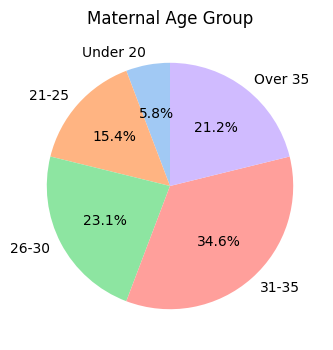

In [ ]:
x2 = age_group_count.iloc[:, 0]
y2 = age_group_count['Total_Frequency']
plt.figure(figsize=(6, 4))
plt.pie(y2, labels=x2, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Maternal Age Group')
plt.savefig('Maternal_Age_SPA_PieChart.png', dpi=300, bbox_inches='tight')
plt.show()

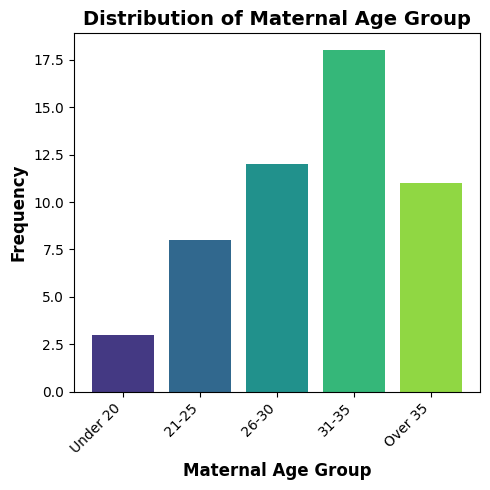

In [ ]:
x2 = age_group_count.iloc[:, 0]
y2 = age_group_count['Total_Frequency']
plt.figure(figsize=(5, 5))
plt.bar(x2, y2, color=sns.color_palette('viridis', len(x2)))
plt.xlabel('Maternal Age Group', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Maternal Age Group', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout
plt.savefig('Maternal_Age_SPA_Bar.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
def categorize_education(years1):
    if years1 >= 0 and years1 <= 6:
        return 'Low Education level(0-6 years)'
    elif years1 >= 7 and years1 <= 10:
        return 'Middle Education Level(7-10 years)'
    else:
        return 'Higher Education Level(11+ years)'
stillbirth_outcome.loc[:, 'PW_EDUCATION_Category'] = stillbirth_outcome['PW_EDUCATION'].apply(categorize_education)
# Calculate value counts for the new education categories
pw_edu_count1 = stillbirth_outcome['PW_EDUCATION_Category'].value_counts().reset_index()
pw_edu_count1.columns = ['PW_EDUCATION', 'Total_PW_EDUCATION']
pw_edu_count1

,PW_EDUCATION,Total_PW_EDUCATION
0,Low Education level(0-6 years),33
1,Middle Education Level(7-10 years),30
2,Higher Education Level(11+ years),3


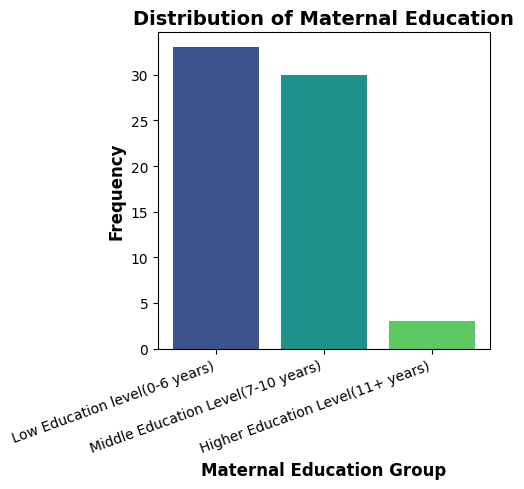

In [ ]:
x2 = pw_edu_count1.iloc[:, 0]
y2 = pw_edu_count1['Total_PW_EDUCATION']
plt.figure(figsize=(5, 5))
plt.bar(x2, y2, color=sns.color_palette('viridis', len(x2)))
plt.xlabel('Maternal Education Group', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Maternal Education', fontsize=14, fontweight='bold')
plt.xticks(rotation=20, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout
plt.show()

In [ ]:
stillbirth_outcome.loc[:, 'WEALTH_INDEX'] = stillbirth_outcome['WEALTH_INDEX']
wealth_group = stillbirth_outcome['WEALTH_INDEX'].value_counts().reset_index()
wealth_group.columns = ['WEALTH_INDEX', 'Total_Frequency']
wealth_group

,WEALTH_INDEX,Total_Frequency
0,Richest,19
1,Middle,14
2,Rich,13
3,Poor,13
4,Poorest,7


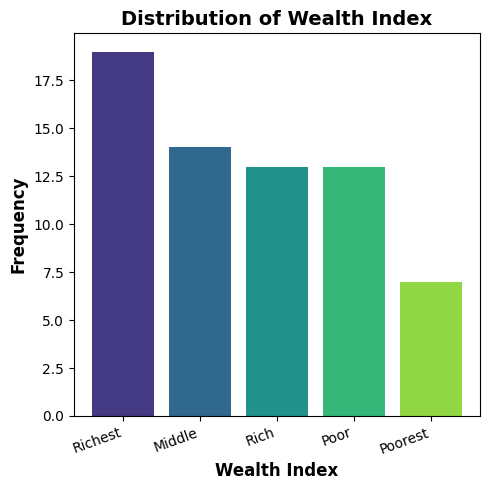

In [ ]:
x2 = wealth_group.iloc[:, 0]
y2 = wealth_group['Total_Frequency']
plt.figure(figsize=(5, 5))
plt.bar(x2, y2, color=sns.color_palette('viridis', len(x2)))
plt.xlabel('Wealth Index', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Wealth Index', fontsize=14, fontweight='bold')
plt.xticks(rotation=20, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout
plt.show()

In [ ]:
def categorize_weight(weight1):
    if weight1 < 50:
        return 'Underweight (<50 kg)'
    elif 50 <= weight1 <= 70:
        return 'Normal weight (50-70 kg)'
    elif 71 <= weight1 <= 90:
        return 'Overweight (71-90 kg)'
    else:
        return 'Obesity (>90 kg)'
stillbirth_outcome.loc[:, 'MAT_WEIGHT_Category'] = stillbirth_outcome['MAT_WEIGHT'].apply(categorize_weight).astype('object')
weight_group = stillbirth_outcome['MAT_WEIGHT_Category'].value_counts().reset_index()
weight_group.columns = ['MAT_WEIGHT_Category', 'Total_Frequency']
weight_group

,MAT_WEIGHT_Category,Total_Frequency
0,Normal weight (50-70 kg),35
1,Underweight (<50 kg),13
2,Overweight (71-90 kg),12
3,Obesity (>90 kg),6


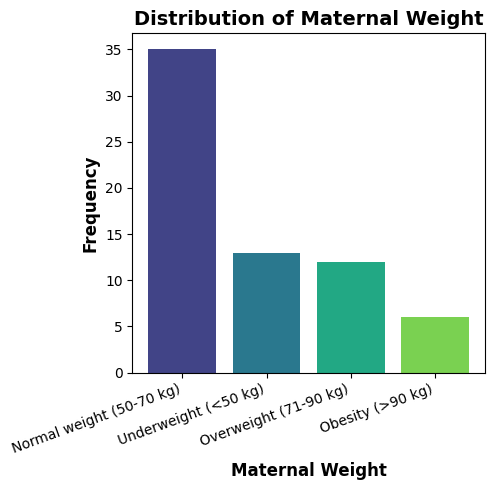

In [ ]:
x2 = weight_group.iloc[:, 0]
y2 = weight_group['Total_Frequency']
plt.figure(figsize=(5, 5))
plt.bar(x2, y2, color=sns.color_palette('viridis', len(x2)))
plt.xlabel('Maternal Weight', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Maternal Weight', fontsize=14, fontweight='bold')
plt.xticks(rotation=20, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout
plt.show()

In [ ]:
def categorize_sbp1(sbp1):
    if sbp1 < 120:
        return 'Normal (<120 mmHg)'
    elif 120 <= sbp1 <= 129:
        return 'Elevated (120-129 mmHg)'
    elif 130 <= sbp1 <= 139:
        return 'Hypertension Stage 1 (130-139 mmHg)'
    elif 140 <= sbp1 <= 179:
        return 'Hypertension Stage 2 (140-179 mmHg)'
    else:
        return 'Hypertensive Crisis (≥180 mmHg)'
stillbirth_outcome.loc[:, 'SBP1_Category'] = stillbirth_outcome['SBP1'].apply(categorize_sbp1).astype('object')
sbp1_group = stillbirth_outcome['SBP1_Category'].value_counts().reset_index()
sbp1_group.columns = ['SBP2_Category', 'Total_Frequency']
sbp1_group

,SBP2_Category,Total_Frequency
0,Normal (<120 mmHg),43
1,Hypertension Stage 1 (130-139 mmHg),9
2,Elevated (120-129 mmHg),8
3,Hypertension Stage 2 (140-179 mmHg),5
4,Hypertensive Crisis (≥180 mmHg),1


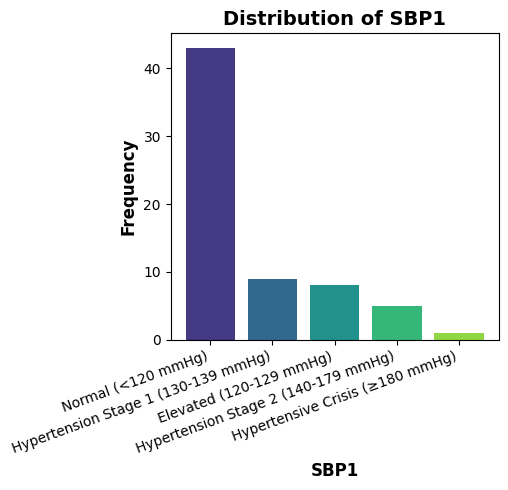

In [ ]:
x2 = sbp1_group.iloc[:, 0]
y2 = sbp1_group['Total_Frequency']
plt.figure(figsize=(5, 5))
plt.bar(x2, y2, color=sns.color_palette('viridis', len(x2)))
plt.xlabel('SBP1', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of SBP1', fontsize=14, fontweight='bold')
plt.xticks(rotation=20, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout
plt.show()

In [ ]:
def categorize_dbp(dbp11):
    if dbp11 < 80:
        return 'Normal (<80 mmHg)'
    elif 80 <= dbp11 <= 89:
        return 'Elevated (80-89 mmHg)'
    elif 90 <= dbp11 <= 99:
        return 'Hypertension Stage 1 (90-99 mmHg)'
    elif 100 <= dbp11 <= 119:
        return 'Hypertension Stage 2 (100-119 mmHg)'
    else:
        return 'Hypertensive Crisis (≥120 mmHg)'
stillbirth_outcome.loc[:, 'DBP1_Category'] = stillbirth_outcome['DBP1'].apply(categorize_dbp).astype('object')
dbp1_group = stillbirth_outcome['DBP1_Category'].value_counts().reset_index()
dbp1_group.columns = ['DBP1_Category', 'Total_Frequency']
dbp1_group

,DBP1_Category,Total_Frequency
0,Normal (<80 mmHg),46
1,Elevated (80-89 mmHg),15
2,Hypertension Stage 1 (90-99 mmHg),4
3,Hypertension Stage 2 (100-119 mmHg),1


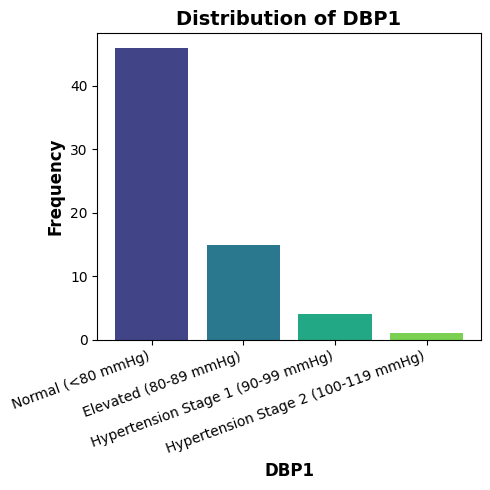

In [ ]:
x2 = dbp1_group.iloc[:, 0]
y2 = dbp1_group['Total_Frequency']
plt.figure(figsize=(5, 5))
plt.bar(x2, y2, color=sns.color_palette('viridis', len(x2)))
plt.xlabel('DBP1', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of DBP1', fontsize=14, fontweight='bold')
plt.xticks(rotation=20, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout
plt.show()

In [ ]:
def categorize_gravidity(gravidity1):
    if 1 <= gravidity1 <= 2:
        return 'Low Gravidity (1-2 pregnancies)'
    elif 3 <= gravidity1 <= 5:
        return 'Moderate Gravidity (3-5 pregnancies)'
    else:
        return 'High Gravidity (6 or more pregnancies)'
# Create a new column for categories
stillbirth_outcome.loc[:, 'GRAVIDITY_Category'] = (stillbirth_outcome['GRAVIDITY'].apply(categorize_gravidity).astype('object'))
gravidity_group = stillbirth_outcome['GRAVIDITY_Category'].value_counts().reset_index()
gravidity_group.columns = ['GRAVIDITY_Category', 'Total_Frequency']
gravidity_group

,GRAVIDITY_Category,Total_Frequency
0,High Gravidity (6 or more pregnancies),27
1,Low Gravidity (1-2 pregnancies),23
2,Moderate Gravidity (3-5 pregnancies),16


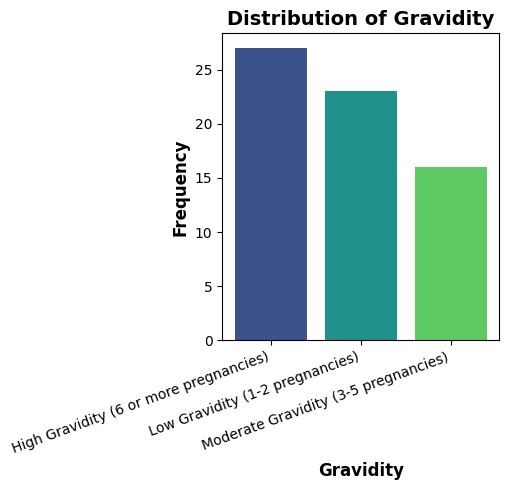

In [ ]:
x2 = gravidity_group.iloc[:, 0]
y2 = gravidity_group['Total_Frequency']
plt.figure(figsize=(5, 5))
plt.bar(x2, y2, color=sns.color_palette('viridis', len(x2)))
plt.xlabel('Gravidity', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Gravidity', fontsize=14, fontweight='bold')
plt.xticks(rotation=20, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout
plt.show()

In [ ]:
def categorize_parity(parity_1):
    if parity_1 == 0:
        return '0 deliveries'
    elif parity_1 == 1:
        return '1 delivery'
    elif 2 <= parity_1 <= 4:
        return '2-4 deliveries'
    else:
        return '5 or more deliveries'
stillbirth_outcome.loc[:, 'PARITY_Category'] = (stillbirth_outcome['PARITY'].apply(categorize_parity).astype('object'))
# Count frequency for each category
parity_1_group = stillbirth_outcome['PARITY_Category'].value_counts().reset_index()
parity_1_group.columns = ['PARITY_Category', 'Total_PARITY']
parity_1_group

,PARITY_Category,Total_PARITY
0,2-4 deliveries,37
1,5 or more deliveries,21
2,1 delivery,7
3,0 deliveries,1


In [ ]:
stillbirth_outcome.loc[:, 'TYPEDELIV'] = stillbirth_outcome['TYPEDELIV']
typedeliv1_group = stillbirth_outcome['TYPEDELIV'].value_counts().reset_index()
typedeliv1_group.columns = ['TYPEDELIV', 'Total_Frequency']
typedeliv1_group

,TYPEDELIV,Total_Frequency
0,Normally through the vagina,60
1,Caesarean Section,6


In [ ]:
def categorize_previous(prev_mis1):
    if prev_mis1 == 0:
        return '0 (ZERO_MISC)'
    elif prev_mis1 == 1:
        return '1 (ONE_MISC)'
    else:
        return '2+ (Over 2)'
# Create a new column for categorized previous miscarriages
spa_outcome.loc[:, 'PREV_MIS_Category'] = (spa_outcome['PREV_MIS'].apply(categorize_previous).astype('object'))
# Count frequency for each category
prev_mis1_group = spa_outcome['PREV_MIS_Category'].value_counts().reset_index()
prev_mis1_group.columns = ['PREV_MIS_Category', 'Total_PREV_MIS']
prev_mis1_group

,PREV_MIS_Category,Total_PREV_MIS
0,0 (ZERO_MISC),42
1,1 (ONE_MISC),6
2,2+ (Over 2),4


In [ ]:
prev_sb1_group = stillbirth_outcome['PREV_SB'].value_counts().reset_index()
prev_sb1_group.columns = ['PREV_SB', 'Total_Frequency']
prev_sb1_group

,PREV_SB,Total_Frequency
0,0,55
1,1,11


In [ ]:
prev_ptb1_group = preterm_outcome['PREV_PTB'].value_counts().reset_index()
prev_ptb1_group.columns = ['PREV_PTB', 'Total_Frequency']
prev_ptb1_group

,PREV_PTB,Total_Frequency
0,0,565
1,1,26


In [ ]:
# List of features
features = ['PW_EDUCATION_Category', 'WEALTH_INDEX',
    'MAT_WEIGHT_Category','SBP1_Category', 'DBP1_Category','GRAVIDITY_Category',
    'PARITY_Category', 'PREV_PTB']
# Cross-tabulations
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        col1 = features[i]
        col2 = features[j]
        crosstab_result = pd.crosstab(stillbirth_outcome[col1], stillbirth_outcome[col2])
        #print(f"Cross-tabulation of {col1} vs {col2}:")
        #print(crosstab_result)
        #print("\n" + "=" * 50 + "\n")

**Splitting the Data into Train and Test**

In [ ]:
# Spontaneous Abortion
new_data['GAGEBRTH'] = new_data['GAGEBRTH'].apply(lambda x: 1 if x <= 20 else 0)

In [ ]:
# Stillbirth
filtered_rows.loc[:, 'GAGEBRTH'] = filtered_rows['GAGEBRTH'].apply(lambda x: 1 if x <= 37 else 0)
filtered_rows['GAGEBRTH'].value_counts()

,count
GAGEBRTH,
1.0,66
0.0,40


In [ ]:
new_filtered_rows.loc[:, 'GAGEBRTH'] = new_filtered_rows['GAGEBRTH'].apply(lambda x: 1 if x <= 37 else 0)
new_filtered_rows['GAGEBRTH'].value_counts()

,count
GAGEBRTH,
0.0,3776
1.0,504


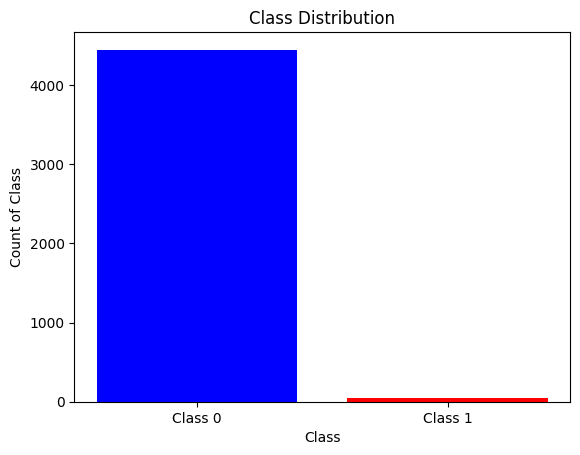

In [ ]:
y = new_data['GAGEBRTH']
count = y.value_counts() # Count the occurrences of each values
plt.bar(count.index, count.values, color = ['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count of Class')
plt.title('Class Distribution')
plt.xticks(count.index, ['Class 0', 'Class 1'])
plt.show()

In [ ]:
x = pd.get_dummies(new_filtered_rows[['PW_AGE','PW_EDUCATION','PREV_MIS','WEALTH_INDEX','MAT_WEIGHT','SBP1','DBP1','GRAVIDITY','PARITY','TYPEDELIV']], drop_first=False)
y = new_filtered_rows['GAGEBRTH']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)
print('X_train:',x_train.shape[0])
print('Y_train:',y_train.shape[0])
print('X_test:',x_test.shape[0])
print('Y_test:',y_test.shape[0])

NameError: name 'x' is not defined

**Class Imbalance**

In [ ]:
from imblearn.over_sampling import SMOTE
# Convert boolean columns to integers
x_train = x_train.astype(int)
x_test = x_test.astype(int)
# Apply SMOTE only on the training data
smote = SMOTE(sampling_strategy='minority', random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

# Random Oversampling
#from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(random_state=42)
#x_train, y_train = ros.fit_resample(x_train, y_train)

# Random Undersampling
#from imblearn.under_sampling import RandomUnderSampler
#rus = RandomUnderSampler(random_state=42)
#x_train, y_train = rus.fit_resample(x_train, y_train)

NameError: name 'x_train' is not defined

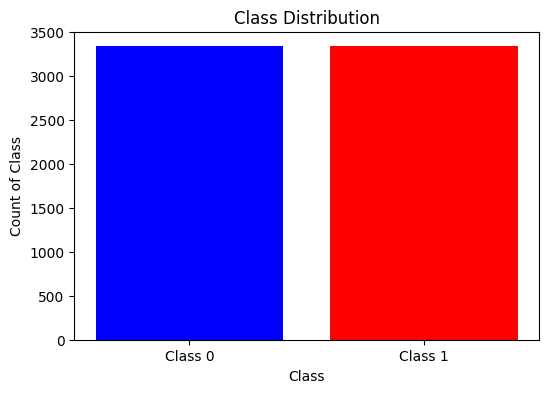

In [ ]:
y1 = y_train
count1 = y1.value_counts() # Count the occurrences of each values
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
plt.bar(count1.index, count1.values, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count of Class')
plt.title('Class Distribution')
plt.xticks(count1.index, ['Class 0', 'Class 1'])
plt.show()

**Standardization of the Data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

**LOGISTIC REGRESSION MODEL**

In [ ]:
# Creating and training the logistic regression model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter = 1000)
log_model.fit(x_train_s, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = log_model.predict(x_test_s)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9795737122557726


In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

Precision: 0.1111111111111111


In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[1102    8]
 [  15    1]]


In [ ]:
from sklearn.metrics import classification_report
# Convert probabilities to discrete class labels using threshold 0.5
y_pred_discrete = np.where(y_pred > 0.5, 1, 0)
report = classification_report(y_test, y_pred_discrete, zero_division=1)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1110
           1       0.11      0.06      0.08        16

    accuracy                           0.98      1126
   macro avg       0.55      0.53      0.53      1126
weighted avg       0.97      0.98      0.98      1126



In [ ]:
coefficients = log_model.coef_[0]
feature_importance = pd.DataFrame({'Feature': x_test.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.reindex(feature_importance.Coefficient.abs().sort_values(ascending=False).index)
#print(feature_importance)

In [ ]:
odds_ratios = np.exp(log_model.coef_)
# Create a DataFrame to display odds ratios
odds_ratios_df = pd.DataFrame(odds_ratios, columns=x_test.columns)
#odds_ratios_df

In [ ]:
from sklearn.metrics import roc_curve, auc

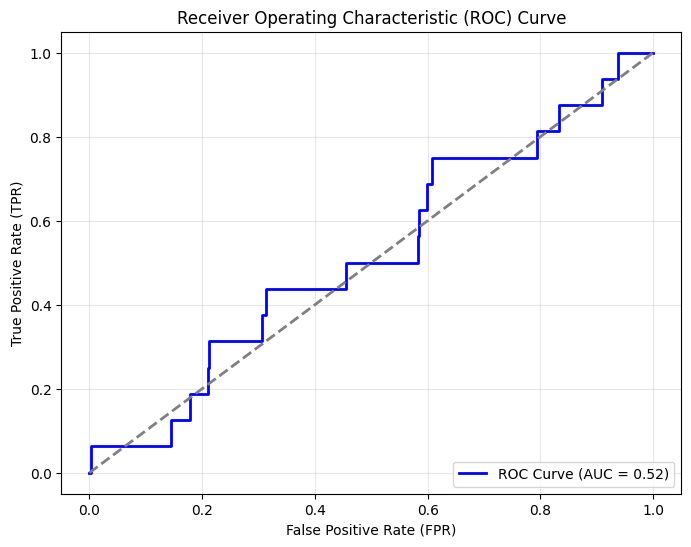

In [ ]:
# Compute ROC curve and AUC
y_prob = log_model.predict_proba(x_test_s)[:, 1]
# Compute ROC curve
fpr_lg, tpr_lg, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr_lg, tpr_lg)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lg, tpr_lg, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

**K-NEAREST NEIGHBOR - MODELS (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
# Train the model
knn.fit(x_train_s, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Predict on test data
y_pred_knn = knn.predict(x_test_s)
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Accuracy: 0.9591474245115453


In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Confusion Matrix:
 [[1080   30]
 [  16    0]]


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_knn, zero_division=1))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1110
           1       0.00      0.00      0.00        16

    accuracy                           0.96      1126
   macro avg       0.49      0.49      0.49      1126
weighted avg       0.97      0.96      0.97      1126



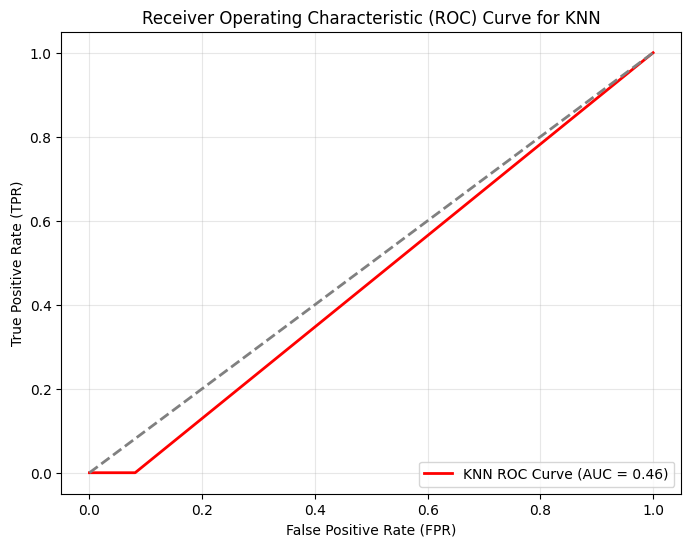

In [ ]:
# Compute ROC curve and AUC for KNN
y_prob_knn = knn.predict_proba(x_test_s)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label=f'KNN ROC Curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

**DECISION TREES AND RANDOM FOREST MODEL**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_s, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score
# Predict on test data
y_pred_rf = rf.predict(x_test_s)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Accuracy: 0.9857904085257548


In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:
 [[1110    0]
 [  16    0]]


In [ ]:
class_report  = classification_report(y_test, y_pred_rf, zero_division=1)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1110
           1       1.00      0.00      0.00        16

    accuracy                           0.99      1126
   macro avg       0.99      0.50      0.50      1126
weighted avg       0.99      0.99      0.98      1126



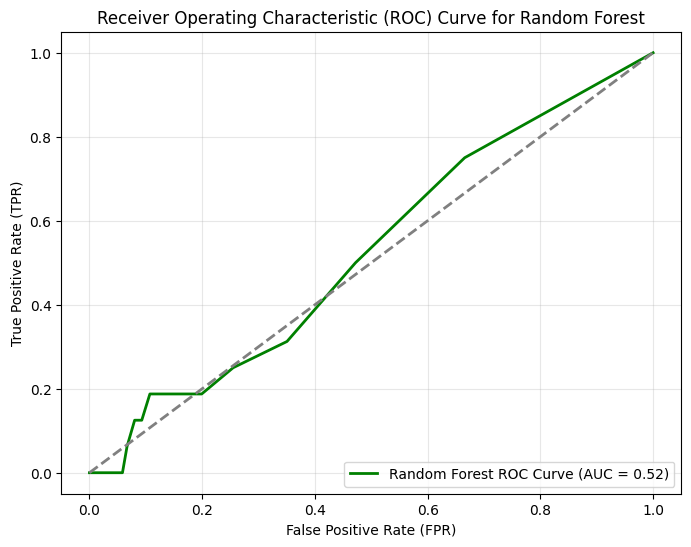

In [ ]:
# Compute ROC curve and AUC for Random Forest
y_prob_rf = rf.predict_proba(x_test_s)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature = rf.feature_importances_
index = x_train.columns
feature_table = pd.DataFrame({'Feature': index, 'Value':feature}).sort_values('Value', ascending=False)
#print(feature_table)

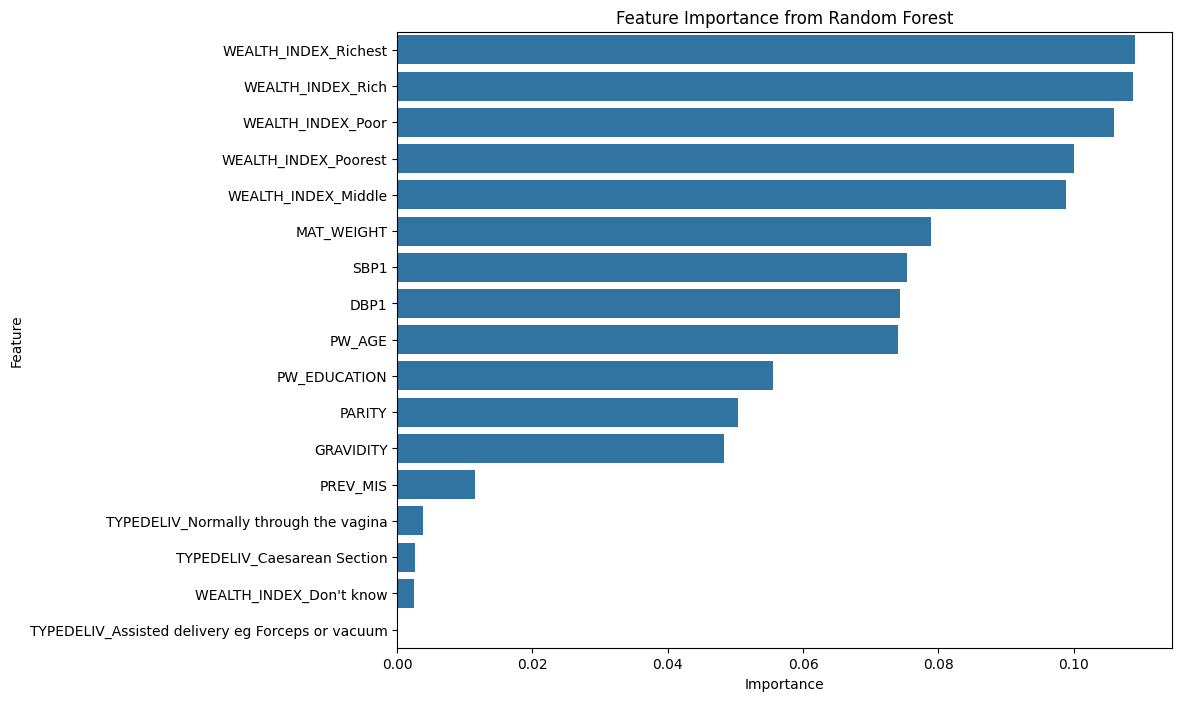

In [ ]:
# Plot a simple bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x='Value', y='Feature', data=feature_table)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**SUPPORT VECTOR MACHINES (SVM)**

In [ ]:
from sklearn.svm import SVC
modl = SVC(kernel='linear', probability=True)
# fitting x_train samples and y_train
modl.fit(x_train_s , y_train )

SVC(kernel='linear', probability=True)

In [ ]:
# Predict on test data
y_pred_svm = modl.predict(x_test_s)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

Accuracy: 0.9857904085257548


In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Confusion Matrix:
 [[1110    0]
 [  16    0]]


In [ ]:
class_report  = classification_report(y_test, y_pred_svm, zero_division=1)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1110
           1       1.00      0.00      0.00        16

    accuracy                           0.99      1126
   macro avg       0.99      0.50      0.50      1126
weighted avg       0.99      0.99      0.98      1126



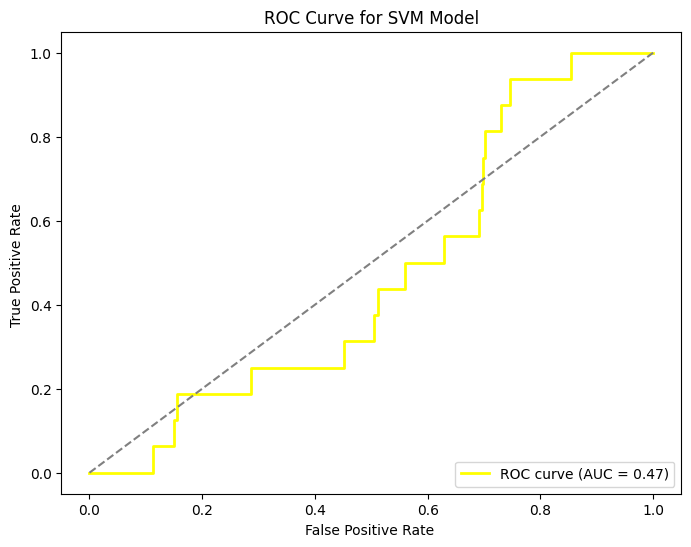

In [ ]:
y_prob = modl.predict_proba(x_test_s)[:, 1]
# Compute ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr_svm, tpr_svm)
# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_svm, tpr_svm, color='yellow', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line (random guessing)
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.title('ROC Curve for SVM Model')
plt.legend(loc="lower right")
plt.show()

In [ ]:
feature = pd.DataFrame({'Feature': x_train.columns, 'Importance': np.abs(modl.coef_[0])})
feature = feature.sort_values(by='Importance', ascending=False)
# Print most important factors
#print(feature)

**EXTREME GRADIENT BOOSTING MODELS (XGBoost)**

In [ ]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(x_train_s, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = model_xgb.predict(x_test_s)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy :", accuracy)

Accuracy : 0.9840142095914742


In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Confusion Matrix:
 [[1108    7]
 [  11    0]]


In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1115
           1       0.00      0.00      0.00        11

    accuracy                           0.98      1126
   macro avg       0.50      0.50      0.50      1126
weighted avg       0.98      0.98      0.98      1126



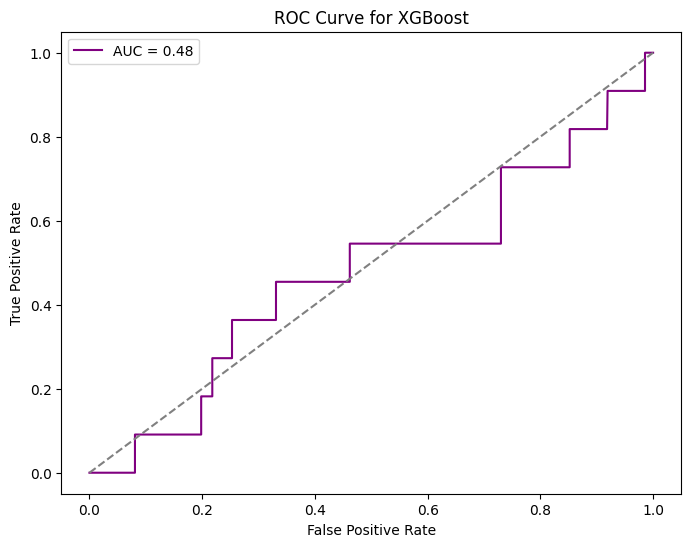

In [ ]:
# Compute ROC curve
y_pred_xgb_prob = model_xgb.predict_proba(x_test_s)[:,1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb_prob)
roc_auc = auc(fpr_xgb, tpr_xgb)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='purple', label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost")
plt.legend()
plt.show()

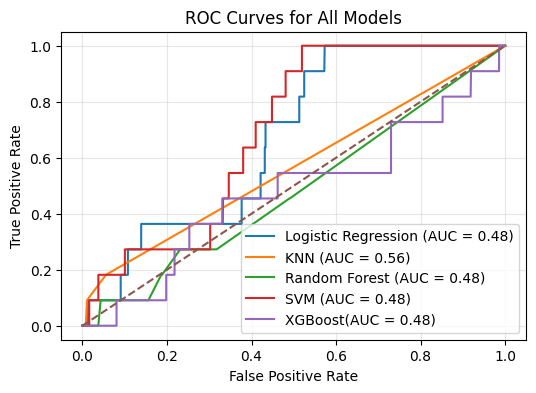

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(fpr_lg, tpr_lg, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost(AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

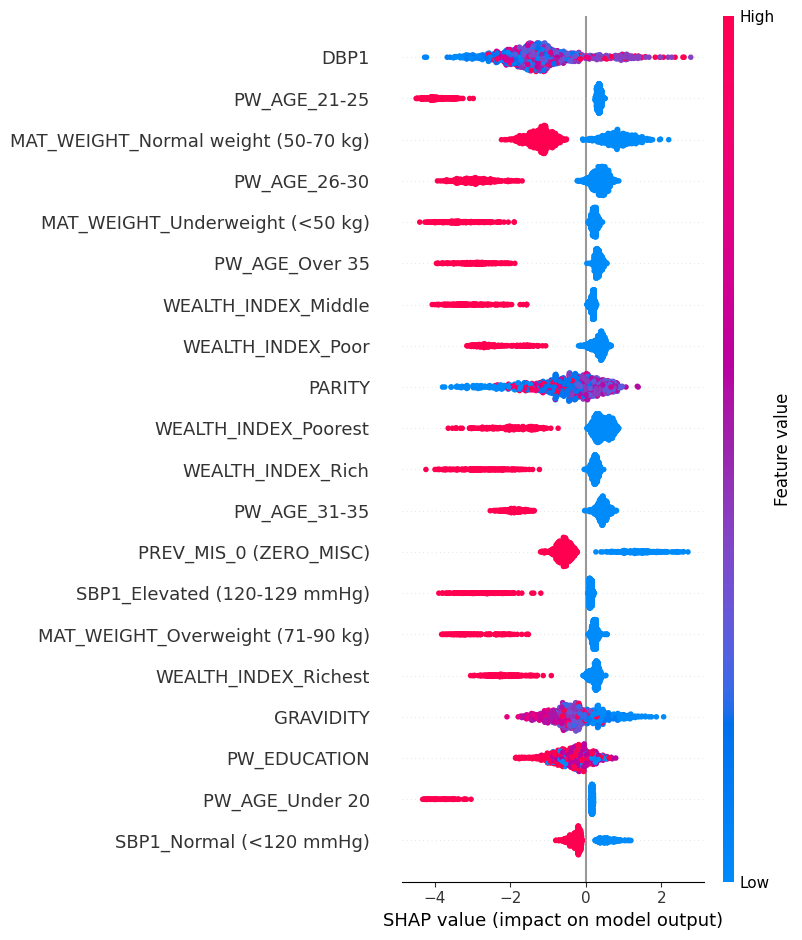

In [ ]:
import shap
explainer = shap.Explainer(model_xgb)
shap_values = explainer(x_test_s) # Call the explainer object on x_test_s
plt.figure(figsize=(6, 4))
shap.summary_plot(shap_values, x_test_s, feature_names=x_test.columns)